Getting the data from http://pjreddie.com/projects/mnist-in-csv/ because the original is in some weird format and I really don't want to deal with it.

In [1]:
from pandas import read_csv, DataFrame

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
indices = [i for i in range(28*28)]
head = ["label"] + indices

In [4]:
mnist = read_csv("mnist_test.csv", names = head)

In [5]:
mnist.head()

,label,0,1,2,3,4,5,6,7,8,...,774,775,776,777,778,779,780,781,782,783
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


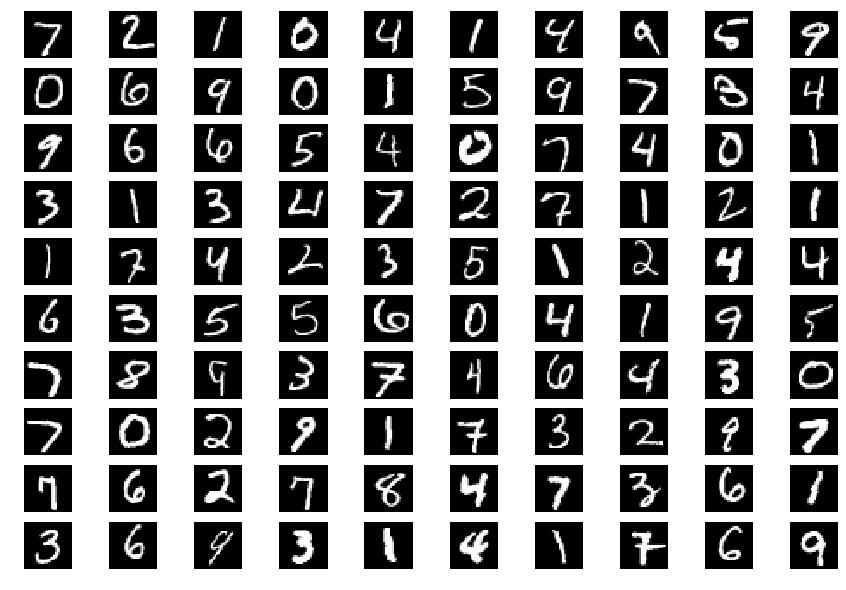

In [6]:
figsize(15,10)
for i in range(100):
    subplot(10,10,i+1)
    image = mnist.ix[i][1:].values.reshape(28,28)
    imshow(image, interpolation='nearest').set_cmap('gray')
    plt.axis('off')

In [86]:
five_one = mnist[(mnist["label"] == 5) | (mnist["label"] == 1)]
five_one = five_one.reset_index().drop("index",1)

In [87]:
fp = open("adj_test.csv","w")
n = 50
for i in range(n):
    for j in range(n):
        if(i == j):
            fp.write("0.0")
        else:
            value = np.exp(-sum((five_one.ix[i][1:].values-five_one.ix[j][1:].values)**2)/5000000)
            fp.write(str(value))
        if(j<n-1):
            fp.write(",")
    fp.write("\n")            
fp.close()

In [24]:
def cluster(vertex, graph, alpha = 1, classified = None):
    n = graph.shape[0]  
    if(classified is None):
        classified = zeros(n)
    else:
        assert(len(classified) == n), "Length of classified does not match size of graph."
        
    internal_weights = graph[vertex].astype(float)    
    degrees = sum(graph, axis = 1)
    perimeter = sum(internal_weights)      
    classified[vertex] = 1
    area = internal_weights[vertex]
    
    while (sum(classified) < n): 
        temp_perimeter = perimeter - 2*internal_weights + degrees
        temp_area = area + internal_weights
        ratios = temp_area / (temp_perimeter + 0.000001) 
        next_vertex = np.argmax(ratios * np.logical_not(classified))
        this_alpha = (area*temp_perimeter[next_vertex])/(perimeter*temp_area[next_vertex]) 
        if(this_alpha > alpha):
            break
        classified[next_vertex] = 1
        internal_weights += graph[next_vertex]
        perimeter = temp_perimeter[next_vertex]
        area = temp_area[next_vertex]

    return classified
            
A = np.array([[0,1,1,0,0,0],[1,0,1,0,0,0],[1,1,0,1,0,0],[0,0,1,0,1,1],[0,0,0,1,0,1],[0,0,0,1,1,0]])
#A = A + diag(ones(len(A)))
this_cluster = cluster(0,A,1, array([0,0,0,0,0,0])) 
this_cluster

array([1, 1, 1, 0, 0, 0])

In [111]:
n = 100
a = np.zeros((n,n))
offset = 0
for i in range(offset, n + offset):
    for j in range(offset, n + offset):
        if(i == j):
            continue
        else:
            value = np.exp(-sum((five_one.ix[i][1:].values-five_one.ix[j][1:].values)**2)/5000000)
            a[i-offset][j-offset] = value

In [112]:
this_cluster = cluster(0,a,alpha = 0.96)
print(len(this_cluster[this_cluster==1]))
print(sum([five_one[offset:offset+n]["label"] == 1]))
1 - sum(abs((five_one[offset:offset+n]["label"] == 1) - this_cluster))/len(this_cluster)

67
57


0.90000000000000002